In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
school = pd.read_csv('timesData.csv')

In [7]:
print(school.shape)
print(school.columns)
print(school.dtypes)

(2603, 14)
Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')
world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object


The data set contains 14 variables with 2603 observations in total. 

Variable 1: 'world_rank' - world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250).

Range of 'world rank'-  By 200th, there is specific one ranking assigned to each academic institution, and there are ties among institutions. After 200th, ranking intervals are used, and the lowest ranking interval is ‘601-800’. 

Variable 2: 'university_name' - name of university

In [8]:
# Variable 3: 'country' - country of each university
school['country'] = school['country'].astype(str)

In [9]:
# Variable 4: 'teaching' - university score for teaching (the learning environment)
school['teaching'].describe()

count    2603.000000
mean       37.801498
std        17.604218
min         9.900000
25%        24.700000
50%        33.900000
75%        46.400000
max        99.700000
Name: teaching, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5BC779E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5BFBD828>]], dtype=object)

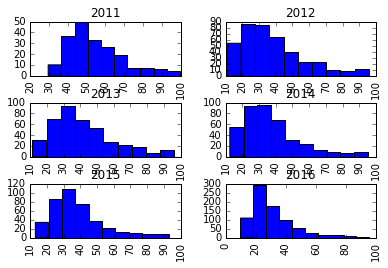

In [10]:
school['teaching'].hist(by = school['year'])

In [11]:
#school['teaching'].groupby(school['year']).describe()

First of all, there are more observations in '2016' compared to earlier year. Secondly, for each year, the data is skewed to the right, which means there are a few insituion with extremely high 'teaching' scores. 

In [12]:
# Variable 5 - 'international' - university score international outlook (staff, students, research)
school['international'] = school['international'].replace('-', '-1').astype(float)

In [13]:
school['international'][school['international'] != -1].describe()

count    2594.000000
mean       52.007440
std        22.103825
min         7.100000
25%        33.425000
50%        50.300000
75%        69.000000
max       100.000000
Name: international, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5C329D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5BF96748>]], dtype=object)

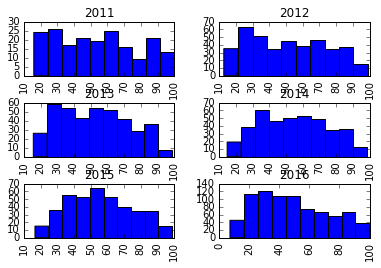

In [14]:
school['international'][school['international'] != -1].hist(by = school['year'])

In [15]:
#school['international'][school['international'] != -1].groupby(school['year']).describe()

There is not obvious skewness for 'international'.

In [16]:
# Variable 7: 'research' - university score for research (volume, income and reputation).
school['research'].describe()

count    2603.000000
mean       35.910257
std        21.254805
min         2.900000
25%        19.600000
50%        30.500000
75%        47.250000
max        99.400000
Name: research, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5C334780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5D9CC048>]], dtype=object)

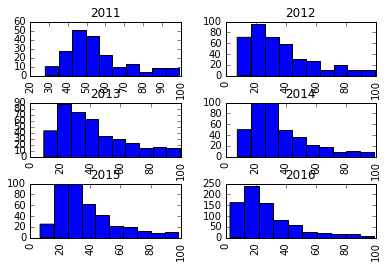

In [17]:
school['research'].hist(by = school['year'])

In [18]:
#school['research'].groupby(school['year']).describe()

For each year, the 'research' variable is skewed to the right, especailly for the latest five years. COmpared to other years, the average 'research' in 2011 is much higher, which implies that in later years there are many institutions that are not good at research joined the ranking system. 

In [19]:
#Variable 8: 'total_score' - total score for university, used to determine rank.
school['total_score'] = school['total_score'].replace('-', '-1').astype(float)

In [20]:
# Variable 9: 'citations' - university score for citations (research influence).
school['citations'].describe()

count    2603.000000
mean       60.921629
std        23.073219
min         1.200000
25%        45.500000
50%        62.500000
75%        79.050000
max       100.000000
Name: citations, dtype: float64

In [21]:
#school['citations'].groupby(school['year']).describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5C3424E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5DCBE630>]], dtype=object)

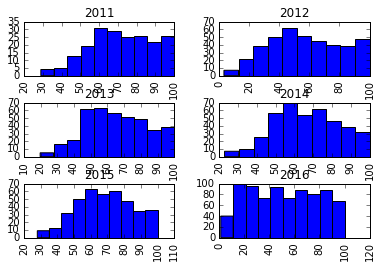

In [22]:
school['citations'].hist(by = school['year'])

In 2016, there are more observations fall in the lower end of the 'citation' distribution, which indicates that there are more schools that are not productive in academic paper. However, absoulte number of citations cannot represent everything. If an insitution is small, then the total number of citations will be relatively low but the ratio of citation to faculty might be high. Therefore, further analysis is needed to reach certain conclusion.

In [23]:
# Variable 10 - 'income' - university score for industry income (knowledge transfer).
school['income'] = school['income'].replace('-', '-1').astype(float)

In [24]:
school['income'][school['income'] != -1].describe()

count    2385.000000
mean       48.979874
std        21.179938
min        24.200000
25%        33.000000
50%        41.000000
75%        59.000000
max       100.000000
Name: income, dtype: float64

In [25]:
#school['income'][school['income'] != -1].groupby(school['year']).describe()

There are 218 missing data for this variable, which could be a probelm used for ranking. 

In [26]:
# Variable 11:'num_students' - number of students at the university.
# student_staff_ratio - Number of students divided by number of staff.

school['num_students'] = school['num_students'].astype(str)

In [27]:
school['num_students'] = school['num_students'].replace('nan', '-1')

In [28]:
school['num_students'] = school['num_students'].map(lambda each: each.replace(',' , ''))

In [29]:
school['num_students'] = school['num_students'][school['num_students'] != '-1']

In [30]:
school['num_students'] = school['num_students'].astype(float)

In [31]:
#school['num_students'].groupby(school['year']).describe()

In [32]:
school['num_students'].describe()

count      2544.000000
mean      23873.758648
std       17675.946877
min         462.000000
25%       12637.750000
50%       20851.000000
75%       29991.000000
max      379231.000000
Name: num_students, dtype: float64

In [33]:
# Variable 12: 'international_students' - Percentage of students who are international.
school['international_students'] = school['international_students'].astype(str)

In [34]:
school['international_students'] = school['international_students'].replace('nan', '-1')

In [35]:
school['international_students'] = school['international_students'].map(lambda each: each.replace('%' , ''))

In [36]:
# 'student_staff_ratio' - Number of students divided by number of staff.
school['student_staff_ratio'].describe()

count    2544.000000
mean       18.445283
std        11.458698
min         0.600000
25%        11.975000
50%        16.100000
75%        21.500000
max       162.600000
Name: student_staff_ratio, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5C34F128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5DFCD4E0>]], dtype=object)

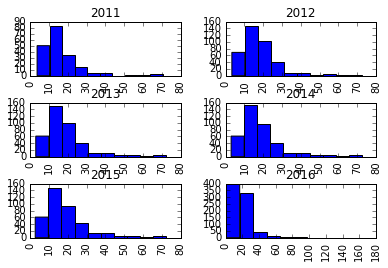

In [37]:
school['student_staff_ratio'].hist(by = school['year'])

In [38]:
#school['student_staff_ratio'].groupby(school['year']).describe()

In [39]:
school['international_students'] = school['international_students'][school['international_students'] != '-1']

In [40]:
school['international_students'] = school['international_students'].astype(float)

In [41]:
school['international_students'] = school['international_students'].map(lambda each: each/100.0) 

In [42]:
#school['international_students'].groupby(school['year']).describe()

In 2016, there are some instituions with very high percentage of international students, which is a new phenomenon and worth further analysis. 

In [43]:
# Variable 13: 'female_male_ratio' - Female student to Male student ratio.
#year - year of the ranking (2011 to 2016 included).
school['female_male_ratio'] = school['female_male_ratio'].astype(str)
school['female_male_ratio'] = school['female_male_ratio'].replace('nan', '')

In [44]:
school['female_male_ratio'] = school['female_male_ratio'].replace('-', '')

In [45]:
school['female_male_ratio'] = school['female_male_ratio'].map(lambda each: each.split(':')) 

In [46]:
female = []
for each in school['female_male_ratio']:
    if each == ['']:
        female.append('NaN')
    else: 
        #print float(each[0].strip())
        #print float(each[1].strip())
        try: 
            female.append(float(each[0].strip())/float(each[1].strip()))
        except ZeroDivisionError:
            female.append('All women')
    

In [47]:
school['female_to_male'] = female

In [48]:
school[school['female_to_male'] == 'All women']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female_to_male
1760,351-400,Ewha Womans University,South Korea,23.5,36.0,18.0,57.6,61.3,-1,17625,14.4,0.06,"[100 , 0]",2015,All women
2227,401-500,Ewha Womans University,South Korea,23.9,34.3,18.3,50.4,57.6,-1,17625,14.4,0.06,"[100 , 0]",2016,All women


In 2015 and 2016, there is one instituion that enrolls only female students.

In [49]:
school[school['female_to_male'] == 'NaN'].groupby(school['year']).size()

year
2011    22
2012    40
2013    36
2014    36
2015    38
2016    64
dtype: int64

The above is the number of institutions that don't have input for 'female_to_male' ratio. 

In [50]:
school['female_to_male'] =  school['female_to_male'][school['female_to_male'] != 'All women']
school['female_to_male'] =  school['female_to_male'][school['female_to_male'] != 'NaN']

In [51]:
school['female_to_male'] = school['female_to_male'].astype(float)
school['female_to_male'].describe()
#school['female_to_male'].groupby(school['year']).describe()

count    2365.000000
mean        1.068446
std         0.406535
min         0.010101
25%         0.851852
50%         1.083333
75%         1.272727
max         3.545455
Name: female_to_male, dtype: float64

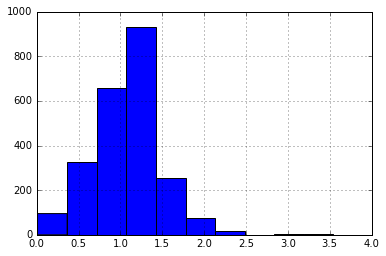

In [52]:
school['female_to_male'].hist()


The mean of 'female_to_male' ratio is close to 1 which mean that there is a good balance between male and female students at university on average. 

In [53]:
# Number of institutions in the ranking system broke down into countries
school.groupby(school['country']).size().sort_values(ascending=False)

country
United States of America     659
United Kingdom               300
Germany                      152
Australia                    117
Canada                       108
Japan                         98
Italy                         94
China                         83
Netherlands                   75
France                        73
South Korea                   57
Spain                         57
Sweden                        57
Taiwan                        57
Switzerland                   47
Belgium                       37
Hong Kong                     34
Turkey                        33
Finland                       32
Austria                       31
Republic of Ireland           31
India                         30
New Zealand                   30
Denmark                       29
Brazil                        25
Norway                        21
South Africa                  20
Russian Federation            20
Israel                        19
Portugal                      18
  

In [54]:
school_sub = school[['teaching',  'research', 'citations', 'student_staff_ratio',  'female_to_male']]

In [55]:
fig_size = plt.rcParams["figure.figsize"]
fig_size
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5E27EDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020A5F8C2240>]], dtype=object)

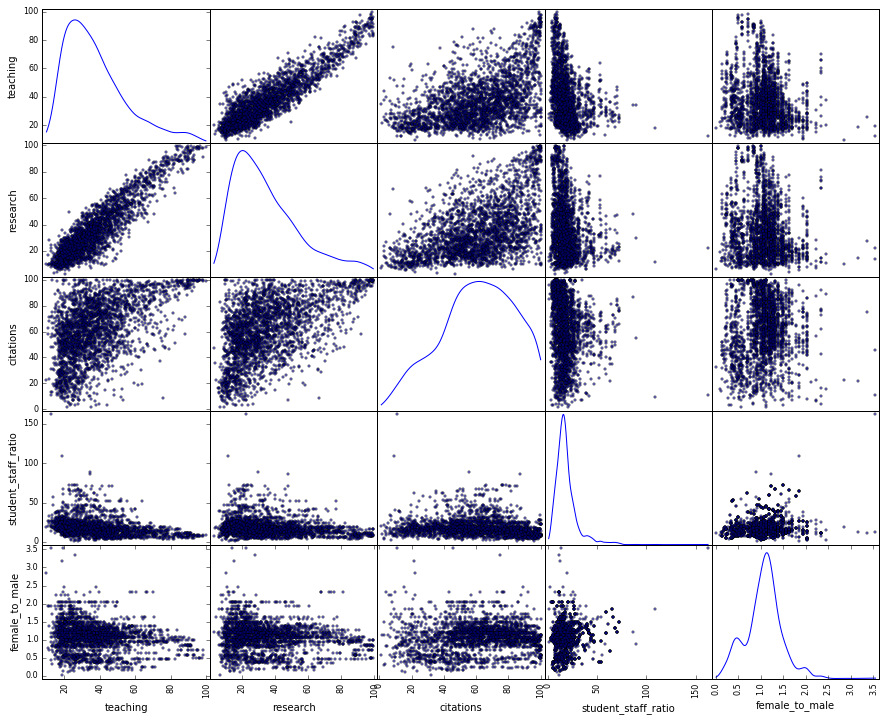

In [56]:
pd.scatter_matrix(school_sub, diagonal='kde')

Form the scatterplots, we can tell there is a strong positive realtionship between 'reseach' and 'teaching'. And in general, 'reseach', 'teaching', and 'student_staff_ratio' is skewed to the right, and 'citation' is skewed to the left, and 'female_to_male' has roughly bell shape. 

In [57]:
school_USA = school[school['country'] == 'United States of America']
school_UK = school[school['country'] == 'United Kingdom']
school_AUS = school[school['country'] == 'Australia']
school_JPN = school[school['country'] == 'Japan']
school_ITA = school[school['country'] == 'Italy']
school_CHN = school[school['country'] == 'China']



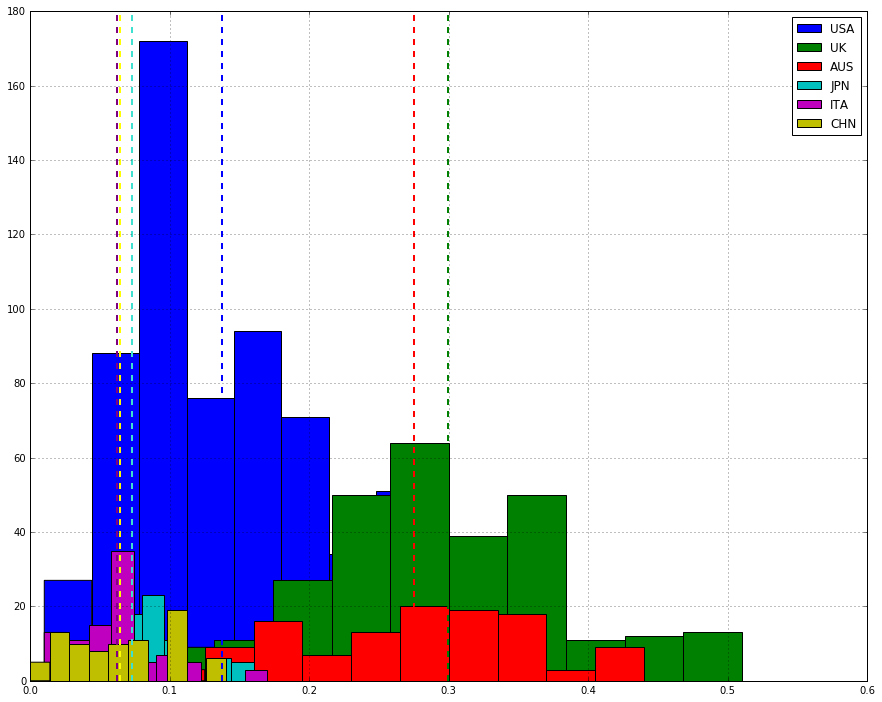

In [58]:
school_USA['international_students'].hist(label = 'USA')
plt.axvline(school_USA['international_students'].mean(), color = 'b', linestyle='dashed', linewidth=2)
school_UK['international_students'].hist(label = 'UK')
plt.axvline(school_UK['international_students'].mean(), color = 'g', linestyle='dashed', linewidth=2)
school_AUS['international_students'].hist(label = 'AUS')
plt.axvline(school_AUS['international_students'].mean(), color = 'r', linestyle='dashed', linewidth=2)
school_JPN['international_students'].hist(label = 'JPN')
plt.axvline(school_JPN['international_students'].mean(), color = 'turquoise', linestyle='dashed', linewidth=2)
school_ITA['international_students'].hist(label = 'ITA')
plt.axvline(school_ITA['international_students'].mean(), color = 'purple', linestyle='dashed', linewidth=2)
school_CHN['international_students'].hist(label = 'CHN')
plt.axvline(school_CHN['international_students'].mean(), color = 'yellow', linestyle='dashed', linewidth=2)


plt.legend(loc='upper right')
plt.show()

On average, instituions at UK involved in the ranking system have highest percentage of international students. 

In [59]:
fig_size = plt.rcParams["figure.figsize"]
fig_size
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [60]:
school_temp = school[school['income'] != -1]
school_temp

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female_to_male
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,0.25,[],2011,NaN
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,0.27,"[33 , 67]",2011,0.492537
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,0.33,"[37 , 63]",2011,0.587302
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,0.22,"[42 , 58]",2011,0.724138
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,0.34,"[46 , 54]",2011,0.851852
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,0.34,"[46 , 54]",2011,0.851852
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060,11.7,0.51,"[37 , 63]",2011,0.587302
12,13,Johns Hopkins University,United States of America,80.9,58.5,89.2,92.3,100.0,86.4,15128,3.6,0.23,"[50 , 50]",2011,1.000000
13,14,Cornell University,United States of America,82.2,62.4,88.8,88.1,34.7,83.9,21424,10.2,0.19,"[48 , 52]",2011,0.923077
15,15,University of Michigan,United States of America,83.9,53.3,89.1,84.1,59.6,83.4,41786,9.0,0.16,"[48 , 52]",2011,0.923077


In [61]:
school_2011 = school_temp[school_temp['year'] == 2011]
school_2012 = school_temp[school_temp['year'] == 2012]
school_2013 = school_temp[school_temp['year'] == 2013]
school_2014 = school_temp[school_temp['year'] == 2014]
school_2015 = school_temp[school_temp['year'] == 2015]

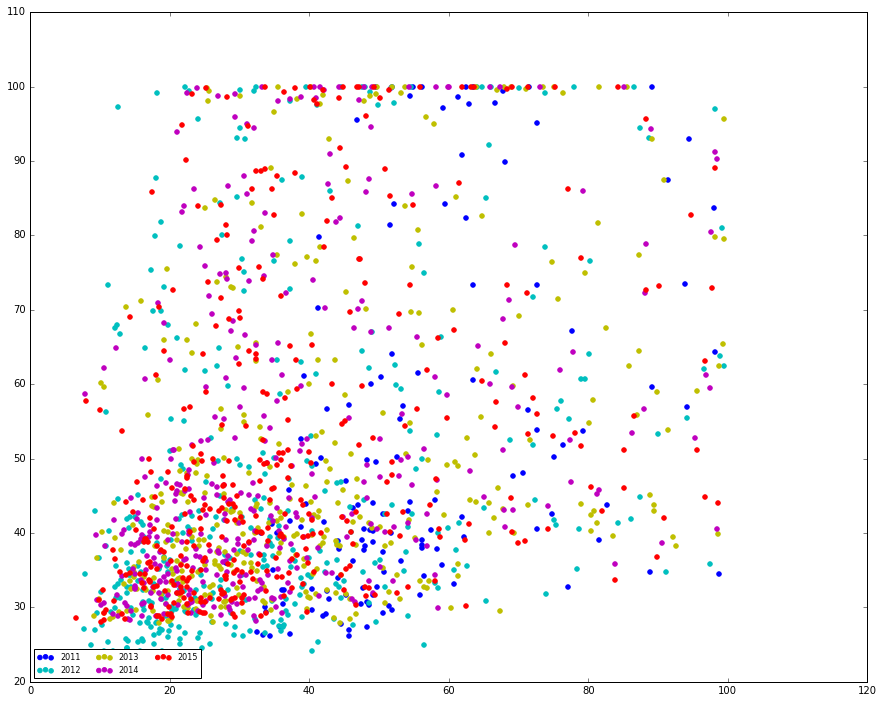

In [62]:
colors=['b', 'c', 'y', 'm', 'r']
fig_2011 = plt.scatter(school_2011['research'], school_2011['income'], color=colors[0])
fig_2012 = plt.scatter(school_2012['research'], school_2012['income'], color=colors[1])
fig_2013 = plt.scatter(school_2013['research'], school_2013['income'], color=colors[2])
fig_2014 = plt.scatter(school_2014['research'], school_2014['income'], color=colors[3])
fig_2015 = plt.scatter(school_2015['research'], school_2015['income'], color=colors[4])
plt.legend((fig_2011,fig_2012,fig_2013,fig_2014,fig_2015),('2011', '2012','2013', '2014', '2015'),numpoints=1, loc='lower left', ncol=3, fontsize=8)